/Users/parsahejabi/Codebases/GitHub_Repositories/USC-CSCI566-DeepLearningandItsApplications/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


How many cats are there?


Predicted answer: 2


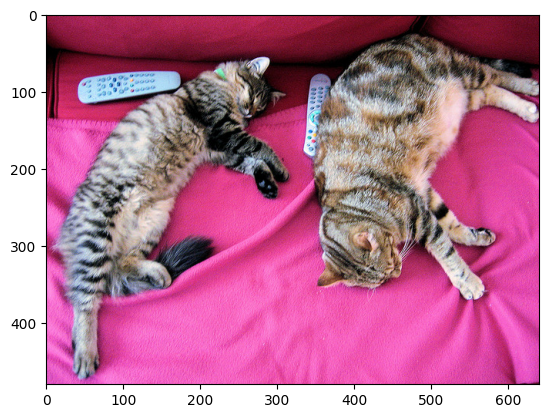

In [1]:
#code from https://huggingface.co/dandelin/vilt-b32-finetuned-vqa

from transformers import ViltProcessor, ViltForQuestionAnswering
import requests
import matplotlib.pyplot as plt

from PIL import Image

# prepare image + question
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
plt.imshow(image)
text = "How many cats are there?"
print(text)
processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

# prepare inputs
encoding = processor(image, text, return_tensors="pt")

# forward pass
outputs = model(**encoding)
logits = outputs.logits
idx = logits.argmax(-1).item()
print("Predicted answer:", model.config.id2label[idx])

In [ ]:
from datasets import load_dataset
dataset = load_dataset("Multimodal-Fatima/VQAv2_validation")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating validation split:   0%|          | 0/214354 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/Multimodal-Fatima___parquet/Multimodal-Fatima--VQAv2_validation-5c5d3f9b3e81dcad/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
example = dataset['validation'][0]

dict_keys(['question_type', 'multiple_choice_answer', 'answers', 'answers_original', 'id_image', 'answer_type', 'question_id', 'question', 'image', 'id', 'clip_tags_ViT_L_14', 'blip_caption', 'LLM_Description_gpt3_downstream_tasks_visual_genome_ViT_L_14', 'DETA_detections_deta_swin_large_o365_coco_classes', 'DETA_detections_deta_swin_large_o365_clip_ViT_L_14', 'DETA_detections_deta_swin_large_o365_clip_ViT_L_14_blip_caption'])
Where is he looking?
a skateboarder doing a trick
['down', 'down', 'at table', 'skateboard', 'down', 'table', 'down', 'down', 'down', 'down']


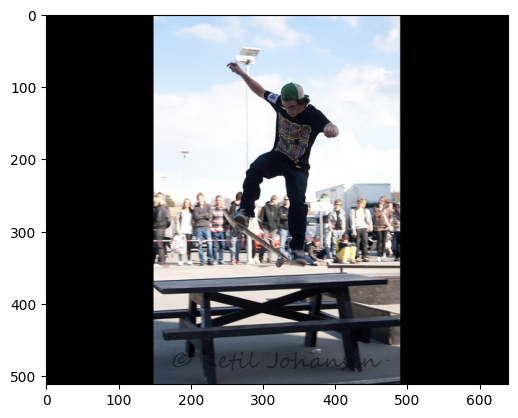

In [ ]:
print(example.keys())



plt.imshow(example['image'])
print(example['question'])
print(example['blip_caption'])
print(example['answers'])